In [1]:
# local files
import stock_data
import patterns

# packages
import warnings
warnings.filterwarnings('ignore')

## __Gather Data__

Note that you need at least 150 rows of data, because the it uses a rolling window: rolling(window=150), which calculates deviation. Less rows than the rolling window  will result in an error.

In [2]:
symbol_list = ['TSLA']
ohlc_data = stock_data.get_yahoo_multiple_historical_stock_data(symbol_list=symbol_list, interval='1h', period='2mo')
tsla_ohlc =  ohlc_data['TSLA']
tsla_ohlc.head()

,date,open,high,low,close,volume
0,2024-02-26 09:30:00-05:00,192.289993,199.860001,192.000000,197.710007,31238191
1,2024-02-26 10:30:00-05:00,197.720001,200.210007,197.229996,199.960007,20727340
2,2024-02-26 11:30:00-05:00,199.959702,201.779999,199.300003,200.279999,17812335
3,2024-02-26 12:30:00-05:00,200.271500,200.740005,199.070007,199.229996,13379703
4,2024-02-26 13:30:00-05:00,199.250000,200.000000,198.600006,199.654999,9114767


## __Collect and Visualize Support and Resistance Data__

Swings = > 3.7348076953069906 %


100%|██████████| 294/294 [00:00<00:00, 1760.18it/s]


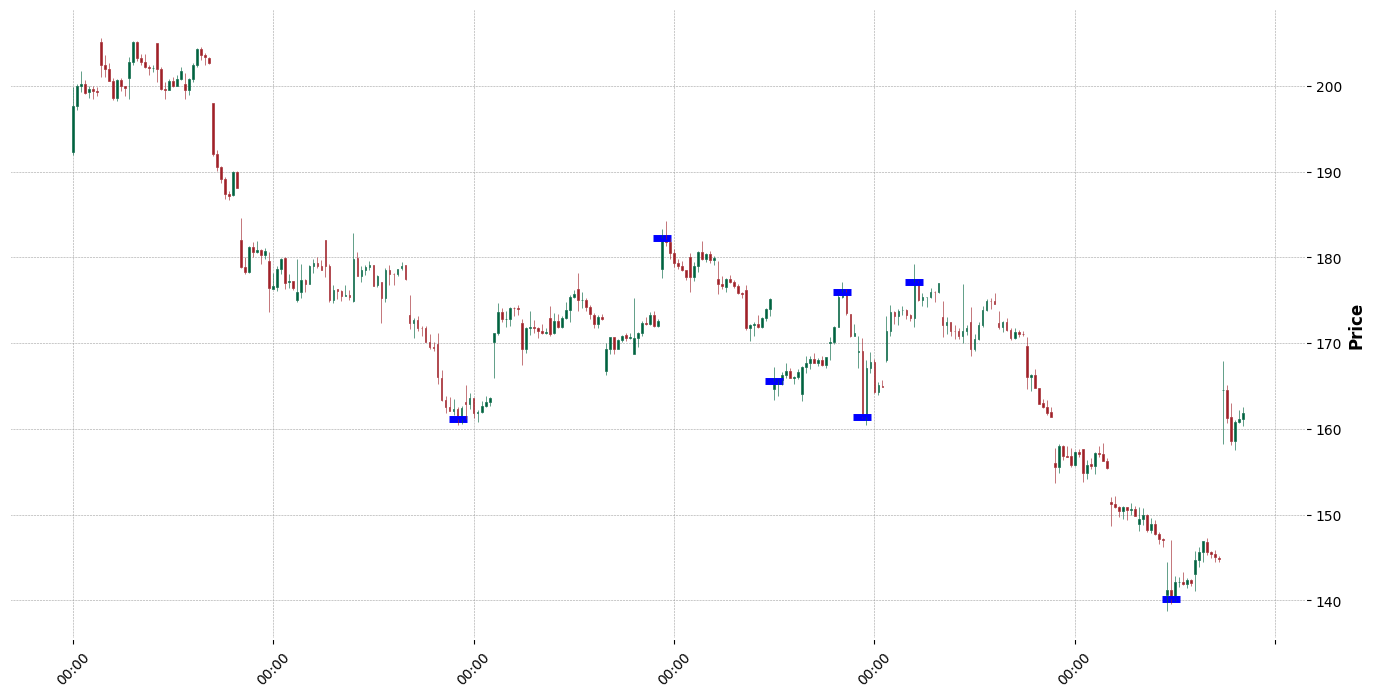

In [3]:
swing_highs, swing_lows = patterns.get_swing_high_lows(ohlc=tsla_ohlc)
res = patterns.ohlc_dates_to_prices_df(ohlc_df=tsla_ohlc, dates_array=swing_highs + swing_lows)
patterns.plot_support_resistance_candlesticks(res, start=-1000, end=-1)
swing_df = patterns.ohlc_swings_df(ohlc_df=res, high_dates=swing_highs, low_dates=swing_lows)

#### __See Swings DataFrame__

In [4]:
swing_df.head()

,date,open,high,low,close,volume,swing,kind,log_return,time_diff,velocity
105,2024-01-30 09:30:00-05:00,195.330002,195.509995,192.190002,194.798798,35160197,194.798798,high,0.073857,4 days 22:00:00,0.015022
134,2024-02-05 10:30:00-05:00,178.929993,178.960007,175.009995,177.389999,30794770,177.389999,low,-0.093617,6 days 01:00:00,0.015495
167,2024-02-09 15:30:00-05:00,192.740005,193.710007,192.289993,193.570007,6777523,193.570007,high,0.087289,4 days 05:00:00,0.020742
180,2024-02-13 14:30:00-05:00,182.940002,183.470001,182.108704,182.440002,8970379,182.440002,low,-0.059218,3 days 23:00:00,0.014960
197,2024-02-16 10:30:00-05:00,199.130005,201.699997,198.029999,201.220001,15992329,201.220001,high,0.097977,2 days 20:00:00,0.034580
